<a href="https://colab.research.google.com/github/riacode/StanfordAI4ALL/blob/main/KNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors

Welcome to the KNN notebook!
Today, we will be:
*  Exploring what k is in KNNs using scikit-learn
* Train our cancer dataset w/ KNNs
* Find optimal k
*  Understand effect of distance metrics in KNNs on our dataset

AI4ALL Camp Day 8


# Part 1: KNN warm-up w/ small dataset
Since our cancer dataset has thousands of features, lets first play with a simpler dataset to understand KNNs!

This part will observe how scikit-learn's KMeans classifier works on some randomly generated data. We'll use some fake data here...

We start by importing all the libraries and methods we need, as well as our fake data!

In [ ]:
#@title Import our libraries and fake data
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd
import numpy as np

#We'll make some fake data using the make_blobs()
# method in sklearn.datasets, which randomly generates
# points that naturally fit into groups (called 'blobs').

# n_samples specifies how many points to generate.
# centers specifies how many blobs to make.
X, y = make_blobs(n_samples=20, centers=1, random_state=41)
blobs = pd.DataFrame(X, columns = ["Size", "Darkness"])
blobs["label"] = blobs.Size < -5   # Make labels as True/False
blobs.Size = blobs.Size + 7  #just shifting the dataset
blobs.Darkness = blobs.Darkness + 12
blobs.label = blobs.label.astype(int) #Cast boolean from above to int 0/1
blobs.loc[4, "label"]  = 0

blobs

,Size,Darkness,label
0,0.792257,1.973909,1
1,1.200165,1.959533,1
2,2.269000,1.996716,0
3,1.864797,3.711768,1
4,1.747760,3.026764,0
5,1.247841,2.888205,1
6,1.450162,0.810298,1
7,3.511151,3.629042,0
8,3.132786,1.541114,0
9,1.408694,4.391333,1


Here, our fake dataset is split into two classes (0/1) -- lets say cancerous and non-cancerous cells. The features we have are the darkness of a cell and the size of the cell. Just as in the example we had in lecture today.

Let's see what this dataset looks like by plotting the points and coloring the points by their labels

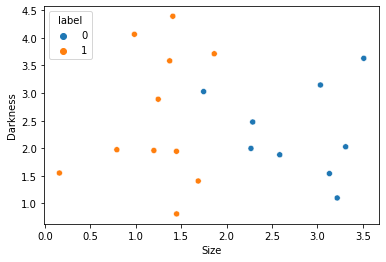

In [ ]:
sns.scatterplot(x= "Size", y="Darkness", hue="label", data=blobs)

Great!  There roughly 2 groups here.  Now what if we have a new, unlabeled example, that's right in between the two blobs? How does KNN work to classify this new spot?

Lets plot the new example in green below:

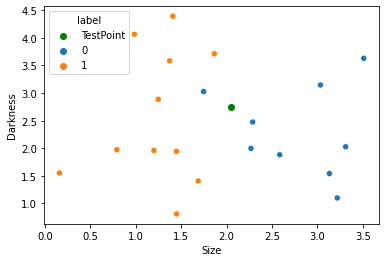

In [ ]:
#plotting new spot with dataset
test_point = np.array([2.05, 2.75]) #The new example!
plt.scatter(test_point[0], test_point[1], label="TestPoint", c="g")
sns.scatterplot(x= "Size", y="Darkness", hue="label", data=blobs)

Let's plot some circles to visually see which spots are closest to our test_spot, and using these, perhaps we can manually predict the label of this green spot.

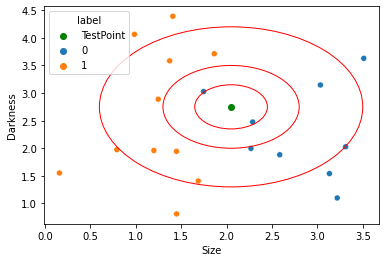

In [ ]:
#Lets plot some circles centering on our test_point
fig, ax = plt.subplots()
for rad in [0.4, .75, 1.45]:
  circle = plt.Circle(test_point, radius=rad, fill=False, color="r" )
  ax.add_artist(circle)

plt.scatter(test_point[0], test_point[1], label="TestPoint", c="g")
sns.scatterplot(x= "Size", y="Darkness", hue="label", data=blobs)

Using the inner-most circle, k=1. What will the KNN prediction be?

What are the k values for the other circle ranges, and what are their corresponding predictions?


YOUR ANSWER:
* First circle (k= 1): 0
* Second circle (k= 2): 0
* Third circle (k= 11): 1

Now that you have calculated the KNN prediction by hand, lets see if they match scikit learns' KNN classifier!

In [ ]:
# Import the default K-Nearest Neighbors classifier
k = 11 ### FILL IN ###
knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric="euclidean")

# Train the classifer with all of our dataset
knn.fit(blobs[["Size", "Darkness"]], blobs.label)

# Predict the label of our test_point
test_pred_label = knn.predict(test_point.reshape(1,-1))
print("The predicted label for k =", str(k), " is: ", test_pred_label[0])

The predicted label for k = 11  is:  1


Did the predicted label match for every k? If not, revisit your own predictions and see where you might have gone wrong.

Congrats!! Now you have some more intuition for KNN, and how different values can change the prediction!

#Part 2: KNNs with our Cancer Dataset
Now, let's implement KNN's on our AML/ALL cancer dataset!

In [ ]:
#@title Run this to setup our files and download your data! Upload the 3 leukemia_ALL_AML_<matrix/labels/genes>.txt files

#Import the common libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

# Upload the data files
from google.colab import files
uploaded = files.upload()

Saving leukemia_ALL_AML_genes.txt to leukemia_ALL_AML_genes (1).txt
Saving leukemia_ALL_AML_labels.txt to leukemia_ALL_AML_labels (1).txt
Saving leukemia_ALL_AML_matrix.txt to leukemia_ALL_AML_matrix (1).txt
Saving leukemia_ALL_AML.csv to leukemia_ALL_AML.csv


In [ ]:
#Load our data to a pandas dataframe
data_df = pd.read_csv('leukemia_ALL_AML.csv')

Let's initiate the KNN classifier from scikit learn

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [ ]:
# Import the default K-Nearest Neighbors classifier
# Make sure you know what k represents in the line of code
k = 3
knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric="euclidean")

In [ ]:
# Break the dataset up into the examples (X) and their labels (y)
X = data_df.drop(columns ="label")
y = data_df.label

# Split up the X and y datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [ ]:
# Train the classifer
knn.fit(X_train, y_train)

# Compute the score (mean accuracy) on test set
score = knn.score(X_test, y_test)
print('KNN score: %f' % score)

KNN score: 0.888889


Recall that k is an input to a K-Neighbors classifier, specifying how many neighboring data points to use on each update.

Try remaking a KNN classifier, training, then testing, for a range of k's to see how the score is affected!

In [ ]:
#Iterate through a range of k's for KNN Classifier
# print or track the accuracy across k's

my_ks = np.arange(1,55)
accuracies = []

for k in my_ks:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric="euclidean")
  X = data_df.drop(columns ="label")
  y = data_df.label
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  accuracies.append(score)
  print('KNN score for', k, ': %f' % score)

KNN score for 1 : 1.000000
KNN score for 2 : 0.944444
KNN score for 3 : 0.888889
KNN score for 4 : 0.833333
KNN score for 5 : 0.833333
KNN score for 6 : 0.833333
KNN score for 7 : 0.833333
KNN score for 8 : 0.833333
KNN score for 9 : 0.888889
KNN score for 10 : 0.777778
KNN score for 11 : 0.833333
KNN score for 12 : 0.722222
KNN score for 13 : 0.722222
KNN score for 14 : 0.722222
KNN score for 15 : 0.722222
KNN score for 16 : 0.666667
KNN score for 17 : 0.722222
KNN score for 18 : 0.666667
KNN score for 19 : 0.722222
KNN score for 20 : 0.666667
KNN score for 21 : 0.722222
KNN score for 22 : 0.611111
KNN score for 23 : 0.611111
KNN score for 24 : 0.611111
KNN score for 25 : 0.611111
KNN score for 26 : 0.611111
KNN score for 27 : 0.611111
KNN score for 28 : 0.611111
KNN score for 29 : 0.611111
KNN score for 30 : 0.611111
KNN score for 31 : 0.611111
KNN score for 32 : 0.611111
KNN score for 33 : 0.611111
KNN score for 34 : 0.611111
KNN score for 35 : 0.611111
KNN score for 36 : 0.611111
K

Text(0.5, 1.0, 'Accuracy vs k value')

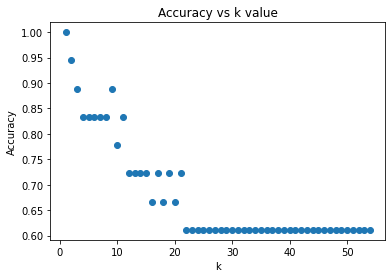

In [ ]:
#Plot your accuracies!
plt.scatter(my_ks, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k value")

Great! Now that you have done your very first "parameter sweep" to optimize the classifier with our dataset, let's use the best k from now on.


In [ ]:
best_k = np.argmax(accuracies) + 1
print(best_k)
print(accuracies[best_k])

1
0.9444444444444444


## Euclidean distance
So far, if you've noticed we've been using the distance metric "euclidean" in our KNNs. These distances play a very important role in KNNs.

Let's take a closer look at what these distance metrics mean, and how they can alter our results.  

"euclidean" is actually a function. Let's try to implement it ourselves to make sure we understand!

euclidean_distance = ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/795b967db2917cdde7c2da2d1ee327eb673276c0)


You might notice that this is the Pythagorean Theorem just for extended for more than two points!

In [ ]:
def my_euclidean_distance(sample1, sample2):
  sample1 = np.array(sample1)
  sample2 = np.array(sample2)

  distance = np.sqrt(np.sum(np.square(sample1 - sample2)))

  return distance

print(my_euclidean_distance([1], [2]))  # should print "1.0"
print(my_euclidean_distance([1, 1], [2, 2]))  # should print "1.41421356237"
print(my_euclidean_distance([0, 1, 2], [5, -7, 13]))  # should print "14.4913767462"

1.0
1.4142135623730951
14.491376746189438


In [ ]:
# now let's test out your distance function in the real-live classifier!
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k, metric=my_euclidean_distance)
knn.fit(X_train, y_train)
# Compute the score (mean accuracy) on test set
y_predict = knn.predict(X_test)
score = knn.score(X_test, y_test)
print(score)

1.0


the results here should be the same as the results from the using the default formula. If not, please revisit your `my_euclidean_distance `

## Manhattan distance
There are actually a bunch of difference distance metrics! For example, this is the Manhattan distance:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/02436c34fc9562eb170e2e2cfddbb3303075b28e)

Instead of the shortest path length, it calculates the distance if you couldnt take shortcuts (ie diagonals). For example, in the map below, green shows the Euclidean distance -- the distance by flight. But if we were to drive in the city, we would have to follow the block system as shown by the blue path.

![alt text](https://qph.fs.quoracdn.net/main-qimg-e73d01f18d0b4a2f57ff2206a3863c10.webp)

(Fun Fact: the name alludes to the way you have to drive in the grid layout of streets on the island of Manhattan --  You can't drive through buildings!)

Let's implement it!

In [ ]:
def my_manhattan_distance(sample1, sample2):
  sample1 = np.array(sample1)
  sample2 = np.array(sample2)

  distance = (np.sum(np.abs(sample1 - sample2)))

  return distance

print(my_manhattan_distance([1], [2]))  # should print "1.0"
print(my_manhattan_distance([1, 1], [2, 2]))  # should print "2"
print(my_manhattan_distance([0, 1, 2], [5, -7, 13]))  # should print "24"



1
2
24


Great! Lets see how our accuracies change with our Manhattan distance metric!

In [ ]:
# now let's test out your distance function in the real-live classifier!
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k, metric=my_manhattan_distance)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
# print(y_predict)
# Compute the score (mean accuracy) on test set
score = knn.score(X_test, y_test)
print(score)


0.8888888888888888


How did the Manhattan distance do compared to Euclidean distance?  Euclidean distance was 1.0 while the Manhattan distance was 0.89.

For really large datasets with a lot of dimensions (features), the Manhattan distance is sometimes preferred over Euclidean distance!

If you're curious about other distance metrics, and how they might effect your accuracies, take a look at [these other metrics. ](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric) Try a few of them out if you have some time!

## Write your own KNN classifier

In [ ]:
class KNearestNeighbors:

    """ kNN Classifier """

    def train(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def classify(self, X_test, k, distance_metric):
        y_pred_list = []
        X_test = np.array(X_test)
        for sample in X_test:
            y_pred = self.classify_sample(sample, k, distance_metric)
            y_pred_list.append(y_pred)
        return y_pred_list

    def classify_sample(self, test_sample, k, distance_metric):
        # find the k nearest neighbors of the test sample
        distances = [] # list of tuples (distance_i, x_train_i, y_train_i) to keep track of the distance to each sample in the training set
        for i in range(len(self.X_train)):
          X_train_i = self.X_train[i]
          y_train_i = self.y_train[i]
          # TODO 1: compute the distance between the gene expression profiles of the two samples.
          # --- your code here ---
          distance_i = distance_metric(X_train_i, test_sample)

          # TODO 2: store the computed distance and the training sample it corresponds to
          # --- your code here ---
          distances.append((distance_i, X_train_i, y_train_i))

        distances.sort()  # it's sorted by the first element of the tuples
        nearest_neighbors = distances[:k] # keep the closest k samples

        # count the number of votes for each label
        votes = {}  # NOTE, votes here is a dictionary, should be saved like votes[label]=count
        for neighbor in nearest_neighbors:
          # TODO 3: implement the body of the loop to count how many votes each label has
	        # --- your code here ---
          if neighbor[2] not in votes:
            votes[neighbor[2]] = 0
          votes[neighbor[2]] += 1

        max_label = 0
        # TODO 4: set max_label to the label with most votes
        # --- your code here ---
        max_label = max(votes, key=votes.get)
        return max_label

In [ ]:
# remember the accuracy function you wrote yesterday?
def accuracy(predicted, actual):
    correct = 0
    actual = np.array(actual)
    for x in range (0,len(predicted)):
      if predicted[x] == actual[x]:
        correct += 1

    acc = correct/len(predicted)
    return acc

In [ ]:
k = 1
my_knn = KNearestNeighbors()

# feed in training data
my_knn.train(X_train, y_train)
# classify test samples
y_preds = my_knn.classify(X_test, k, my_euclidean_distance)
# also try using manhattan distance
#y_preds = my_knn.classify(X_test, k, my_manhattan_distance)
acc = accuracy(y_preds, y_test)
print(acc)

1.0


Is the accuracy same with the KNN classifier from the package? If not, why?
Try different k

#Optional: Calculating accuracy metrics

In [ ]:
from sklearn.metrics import confusion_matrix

#TODO: calculate confusion matrix  MAKE SURE CONCEPT IS EXPLAINED FIRST IN ML LECTURE

# confusion_matrix = confusion_matrix(y_test,y_predict)
# print(confusion_matrix)

def find_TP(y_true, y_pred):
    # counts the number of true positives (y_true = 1, y_pred = 1)
    return ((y_true == y_pred) & (y_true == 1)).sum()

def find_FN(y_true, y_pred):
    # counts the number of false negatives (y_true = 1, y_pred = 0)
    return ((y_true != y_pred) & (y_true == 1)).sum()

def find_FP(y_true, y_pred):
    # counts the number of false positives (y_true = 0, y_pred = 1)
    return ((y_true != y_pred) & (y_true == 0)).sum()

def find_TN(y_true, y_pred):
    # counts the number of true negatives (y_true = 0, y_pred = 0)
    return ((y_true == y_pred) & (y_true == 0)).sum()

def find_conf_matrix_values(y_true,y_pred):
    # calculate TP, FN, FP, TN
    TP = find_TP(y_true,y_pred)
    FN = find_FN(y_true, y_pred)
    FP = find_FP(y_true, y_pred)
    TN = find_TN(y_true, y_pred)

    return TP,FN,FP,TN

def my_accuracy_score(TP,FN,FP,TN):
    return (TP + TN) / (TP + FN + FP + TN)

def my_recall_score(TP,FN,FP,TN):
    # calculates the fraction of positive samples predicted correctly
    return TP/(TP + FN)

def my_precision_score(TP,FN,FP,TN):
    # calculates the fraction of predicted positives samples that are actually positive
    return TP/(TP + FP)

def get_accuracy_metric(y_test, y_predict):
  TP,FN,FP,TN = find_conf_matrix_values(y_test,y_predict)

  accuracy = my_accuracy_score(TP,FN,FP,TN)
  recall = my_recall_score(TP,FN,FP,TN)
  precision = my_precision_score(TP,FN,FP,TN)
  # print(TP,FN,FP,TN )
  return accuracy, recall, precision


In [ ]:
print("Euclidean:", get_accuracy_metric(y_test, y_preds))
print("Manhattan:", get_accuracy_metric(y_test, y_predict))

Euclidean: (1.0, 1.0, 1.0)
Manhattan: (0.8888888888888888, 0.8571428571428571, 0.8571428571428571)


# Try KNN on multi-class classification

In [ ]:
#upload = files.upload()

#Load our data to a pandas dataframe
data_lung = pd.read_csv('lung_normal_4tumors.csv')
# Break the dataset up into the examples (X) and their labels (y)
X = data_lung.drop(columns ="label")
y = data_lung.label

# Split up the X and y datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [ ]:
k = 1
knn_lung = neighbors.KNeighborsClassifier(n_neighbors=k, metric="euclidean")

# Train the classifer
knn_lung.fit(X_train, y_train)

# Compute the score (mean accuracy) on test set
score = knn_lung.score(X_test, y_test)
print('KNN score for Lung Cancer: %f' % score)

KNN score: 0.921569


In [ ]:
k = 1
my_knn_lung = KNearestNeighbors()

# feed in training data
my_knn_lung.train(X_train, y_train)
# classify test samples
y_pred_lung = my_knn_lung.classify(X_test, k, my_euclidean_distance)
# also try using manhattan distance
#y_pred_lung = my_knn.classify(X_test, k, my_manhattan_distance)
acc = accuracy(y_pred_lung, y_test)
print(acc)

0.9215686274509803
